In [5]:
import pandas as pd
import re
from top2vec import Top2Vec

In [6]:
import pandas as pd
import re
pd.options.mode.chained_assignment = None

country = "Australia"
fileName = 'appreciate_campaign_' + country
path = ('appreciate_campaign/appreciate_campaign/' + fileName + ".csv")

data = pd.read_csv(path)
data_text = data[['Cleaned_Tweet','Tweet_removed_stop_word','sentiment']]
data_text['ta_tweet'] = data_text['Tweet_removed_stop_word'].apply(lambda x: x[1:-1])
data_text['ta_tweet'] = data_text['ta_tweet'].str.replace(r"[\"\',]", '',regex=True)


documents = data_text


In [7]:
df1 = documents[documents['sentiment'] >= 4].copy(deep=True)
df1

Cleaned_Tweet  \
0      motivational monday start your journey with us...   
1      i am sure your patients and administration app...   
2      thank you for staying dr ajuwon we appreciate ...   
5      thanks brother cole appreciate it haha was sca...   
9      i appreciate your situ my girl lovely ritahad ...   
...                                                  ...   
40762  im proud that australianaid is investing in he...   
40764  congratulations on your interesting poster pre...   
40766  awesome to have vaccination guru visiting adel...   
40770  great minds have come together in melbourne to...   
40771  we have the brightest medical researchers in t...   

                                 Tweet_removed_stop_word  sentiment  \
0      ['motivational', 'monday', 'start', 'journey',...          5   
1      ['sure', 'patients', 'administration', 'apprec...          5   
2      ['thank', 'staying', 'dr', 'ajuwon', 'apprecia...          5   
5      ['thanks', 'brother', 'cole', 'appreciate', 'h...          4   
9      ['appreciate', 'situ', 'girl', 'lovely', 'rita...          5   
...                                                  ...        ...   
40762  ['im', 'proud', 'australianaid', 'investing', ...          5   
40764  ['congratulations', 'interesting', 'poster', '...          5   
40766  ['awesome', 'vaccination', 'guru', 'visiting',...          5   
40770  ['great', 'minds', 'come', 'together', 'melbou...          5   
40771  ['brightest', 'medical', 'researchers', 'world...          5   

                                                ta_tweet  
0      motivational monday start journey us like than...  
1      sure patients administration appreciate dedica...  
2      thank staying dr ajuwon appreciate wonderful c...  
5      thanks brother cole appreciate haha scared id ...  
9      appreciate situ girl lovely ritahad neurologic...  
...                                                  ...  
40762  im proud australianaid investing health securi...  
40764  congratulations interesting poster presentatio...  
40766  awesome vaccination guru visiting adelaide amp...  
40770  great minds come together melbourne today firs...  
40771  brightest medical researchers world truly incr...  

[19413 rows x 4 columns]

In [8]:
df2 = documents[documents['sentiment'] <= 2].copy(deep=True)
df2

Cleaned_Tweet  \
3      i dont know that you should care who the queer...   
4      my words have gotten too intense or emotional ...   
6      how awful and worrying for you this is not fai...   
8      sorry do you mean prefer facts and evidence wh...   
13     i dont appreciate either but ads promoting pro...   
...                                                  ...   
40760  the doctor standing with morrison specifically...   
40761  more info please victorian courts arent empane...   
40763  i wonder if soot will reinstate to distribute ...   
40765  word of advice get your booster vaccine on a d...   
40768  now onto hendra virus w dr jenny manyweathers ...   

                                 Tweet_removed_stop_word  sentiment  \
3      ['dont', 'know', 'care', 'queer', 'left', 'dis...          2   
4      ['words', 'gotten', 'intense', 'emotional', 'c...          2   
6      ['awful', 'worrying', 'fair', 'appreciate', 's...          1   
8      ['sorry', 'mean', 'prefer', 'facts', 'evidence...          2   
13     ['dont', 'appreciate', 'either', 'ads', 'promo...          2   
...                                                  ...        ...   
40760  ['doctor', 'standing', 'morrison', 'specifical...          1   
40761  ['info', 'please', 'victorian', 'courts', 'are...          1   
40763  ['wonder', 'soot', 'reinstate', 'distribute', ...          1   
40765  ['word', 'advice', 'get', 'booster', 'vaccine'...          1   
40768  ['onto', 'hendra', 'virus', 'w', 'dr', 'jenny'...          1   

                                                ta_tweet  
3      dont know care queer left dismiss simply say p...  
4      words gotten intense emotional carefree apprec...  
6      awful worrying fair appreciate sharing experie...  
8      sorry mean prefer facts evidence considering p...  
13     dont appreciate either ads promoting products ...  
...                                                  ...  
40760  doctor standing morrison specifically said vac...  
40761  info please victorian courts arent empaneling ...  
40763  wonder soot reinstate distribute p2 masks vacc...  
40765  word advice get booster vaccine day dont work ...  
40768  onto hendra virus w dr jenny manyweathers disc...  

[16807 rows x 4 columns]

In [9]:
df3 = documents[documents['sentiment'] == 3].copy(deep=True)
df3

Cleaned_Tweet  \
7      and while i appreciate those who say a break s...   
15     yea the only story i think is worth noting is ...   
16     oh yeah im not saying the world of business is...   
17     i appreciate perspectives of patients and doct...   
33     only by teaching and training doctors as to ho...   
...                                                  ...   
40740  appreciate doctors nurses and supermarket empl...   
40757  ok yes on one or 2 of this things the vaccine ...   
40758  on day 9but still dr is still using paracetamo...   
40767  these stats are absolutely shocking but sittin...   
40769  its more the australian doctors that have done...   

                                 Tweet_removed_stop_word  sentiment  \
7      ['appreciate', 'say', 'break', 'supported', 'g...          3   
15     ['yea', 'story', 'think', 'worth', 'noting', '...          3   
16     ['oh', 'yeah', 'im', 'saying', 'world', 'busin...          3   
17     ['appreciate', 'perspectives', 'patients', 'do...          3   
33     ['teaching', 'training', 'doctors', 'research'...          3   
...                                                  ...        ...   
40740  ['appreciate', 'doctors', 'nurses', 'supermark...          3   
40757  ['ok', 'yes', 'one', '2', 'things', 'vaccine',...          3   
40758  ['day', '9but', 'still', 'dr', 'still', 'using...          3   
40767  ['stats', 'absolutely', 'shocking', 'sitting',...          3   
40769  ['australian', 'doctors', 'done', 'hard', 'wor...          3   

                                                ta_tweet  
7      appreciate say break supported going cover hap...  
15     yea story think worth noting domestic violence...  
16     oh yeah im saying world business different app...  
17     appreciate perspectives patients doctors diffe...  
33     teaching training doctors research done method...  
...                                                  ...  
40740  appreciate doctors nurses supermarket employee...  
40757  ok yes one 2 things vaccine thay fare safe one...  
40758  day 9but still dr still using paracetamol amp ...  
40767  stats absolutely shocking sitting infectionamp...  
40769  australian doctors done hard work virus find m...  

[4552 rows x 4 columns]

In [10]:
if (len(documents) == (len(df1) + len(df2) + len(df3))):
    print('True')
else:
    print('False')

True


In [11]:
# docs = documents.ta_tweet.tolist()
# docs
positive_docs = df1.ta_tweet.tolist()
negative_docs = df2.ta_tweet.tolist()
neutral_docs = df3.ta_tweet.tolist()

# positive_docs
# neutral_docs
# negative_docs
# print (Top2Vec.__doc__)

In [12]:
model = Top2Vec(positive_docs, speed="deep-learn", ngram_vocab="true", embedding_model="doc2vec", workers=8)

2022-07-28 11:33:25,396 - top2vec - INFO - Pre-processing documents for training
2022-07-28 11:33:26,946 - top2vec - INFO - Creating joint document/word embedding
2022-07-28 11:42:29,559 - top2vec - INFO - Creating lower dimension embedding of documents
2022-07-28 11:43:01,982 - top2vec - INFO - Finding dense areas of documents
2022-07-28 11:43:07,712 - top2vec - INFO - Finding topics


In [13]:
model2 = Top2Vec(negative_docs, speed="deep-learn", ngram_vocab="true", embedding_model="doc2vec", workers=8)

2022-07-28 11:43:07,898 - top2vec - INFO - Pre-processing documents for training
2022-07-28 11:43:09,320 - top2vec - INFO - Creating joint document/word embedding
2022-07-28 11:50:13,396 - top2vec - INFO - Creating lower dimension embedding of documents
2022-07-28 11:50:20,401 - top2vec - INFO - Finding dense areas of documents
2022-07-28 11:50:23,836 - top2vec - INFO - Finding topics


In [14]:
model3 = Top2Vec(neutral_docs, speed="deep-learn", ngram_vocab="true", embedding_model="doc2vec",workers=8)

2022-07-28 11:50:23,927 - top2vec - INFO - Pre-processing documents for training
2022-07-28 11:50:24,258 - top2vec - INFO - Creating joint document/word embedding
2022-07-28 11:51:33,268 - top2vec - INFO - Creating lower dimension embedding of documents
2022-07-28 11:51:39,734 - top2vec - INFO - Finding dense areas of documents
2022-07-28 11:51:39,970 - top2vec - INFO - Finding topics


In [15]:
len(model.vocab)

3139

In [16]:
print("Number of topics : " + str(model.get_num_topics()))
topic_sizes, topic_nums = model.get_topic_sizes()
print (topic_sizes)
print (topic_nums)


Number of topics : 5
[9566 3080 2589 2188 1990]
[0 1 2 3 4]


In [17]:
print("Number of topics : " + str(model2.get_num_topics()))
topic_sizes, topic_nums = model2.get_topic_sizes()
print (topic_sizes)
print (topic_nums)


Number of topics : 2
[12976  3831]
[0 1]


In [18]:
print("Number of topics : " + str(model3.get_num_topics()))
topic_sizes, topic_nums = model3.get_topic_sizes()
print (topic_sizes)
print (topic_nums)


Number of topics : 2
[3242 1310]
[0 1]


In [19]:
topic_words, word_scores, topic_nums = model.get_topics()

for words, scores, num in zip(topic_words, word_scores, topic_nums):
    print (num)
    print (f"Words: {words}")

0
Words: ['would like' 'great input' 'much better' 'well deserved' 'im guessing'
 'feel like' 'never seen' 'long time' 'wed like' 'feels like'
 'im privileged' 'great topic' 'youd like' 'long way' 'well worth'
 'sounds like' 'chinese people' 'cosplay like' 'dont expect' 'weve seen'
 'dont want' 'put together' 'well done' 'single person' 'allowing us'
 'us newseason' 'us whatsapp' 'reminds us' 'past years' 'im proud'
 'related issues' 'anything else' 'end possible' 'years old' 'im sure'
 'us clocking' 'taking time' 'first time' 'say big' 'id like'
 'become registered' 'keep us' 'havent seen' 'come back' 'im grateful'
 'come together' 'really warm' 'yrs ago' 'weeks ago' 'really enjoyed']
1
Words: ['fortnightly' 'laybuy' 'paypal' 'possessions' 'affordably' 'ptz'
 'cameras' 'purchase' 'powered' 'solar' 'payment' 'payments'
 'payment purchase' 'st payment' 'solar panel' 'weekly' 'purchase easy'
 'powered security' 'paypal payments' 'professional ptz' 'easy weekly'
 'weekly laybuy' 'options 

In [20]:
topic_words, word_scores, topic_nums = model2.get_topics()

for words, scores, num in zip(topic_words, word_scores, topic_nums):
    print (num)
    print (f"Words: {words}")

0
Words: ['everyone else' 'couldnt even' 'encourage everyone' 'would nice'
 'helping others' 'someone else' 'good enough' 'would prefer'
 'anything else' 'would appreciated' 'job keeper' 'take granted' 'none us'
 'peoples lives' 'job seeker' 'everything contain' 'economic impact'
 'could done' 'try score' 'job losses' 'isnt helping' 'id encourage'
 'please fix' 'even though' 'one stable' 'international flight'
 'good deed' 'one appreciates' 'phone calls' 'dan andrews' 'ill try'
 'right thing' 'good riddance' 'campaign encourage' 'two weeks'
 'im grateful' 'take away' 'im glad' 'collateral damage' 'looking like'
 'good idea' 'drug companies' 'would appreciate' 'cannot afford'
 'human life' 'good luck' 'state run' 'phone call' 'im thinking'
 'whole lot']
1
Words: ['covidiots meme' 'stayhome staysafe' 'staysafe stayhome' 'usa uk'
 'love stayhome' 'uk usa' 'usa canada' 'memes staysafe' 'tell china'
 'uk oz' 'stayhome gippsnews' 'stayhome feed' 'washyourhands stayhome'
 'sydneylockdown stay

In [25]:
model2.get_num_topics()

2

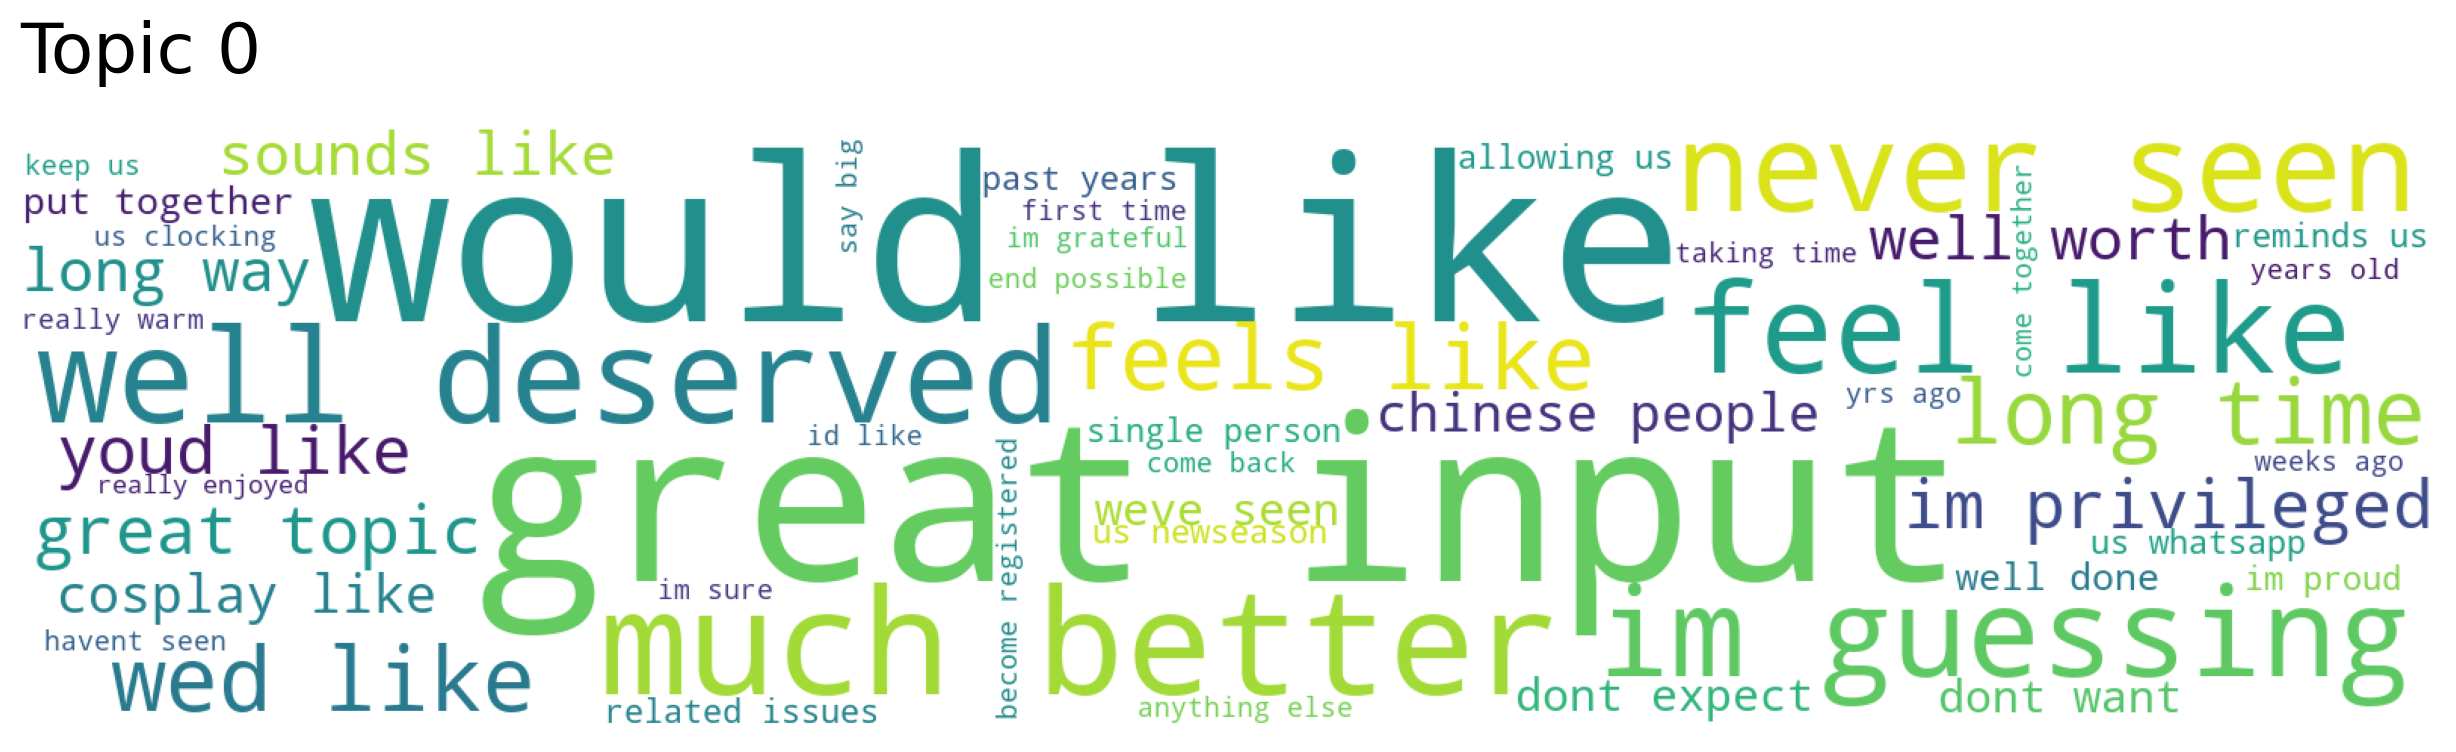

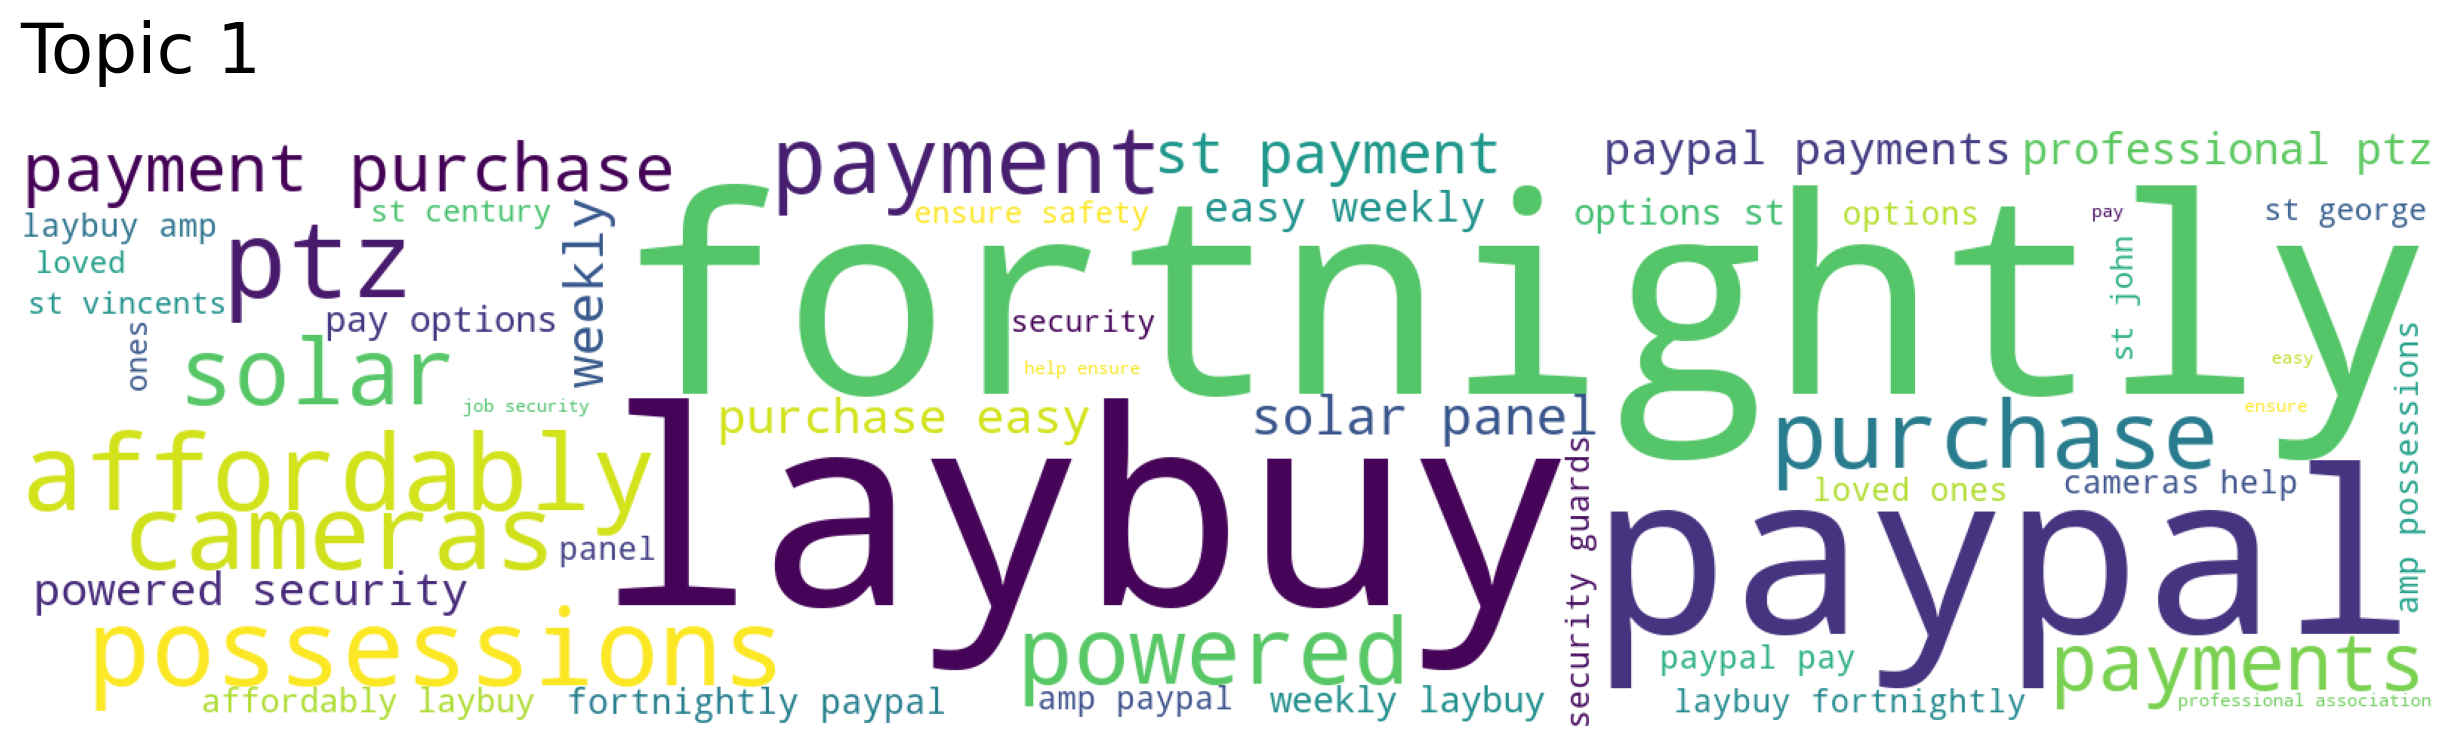

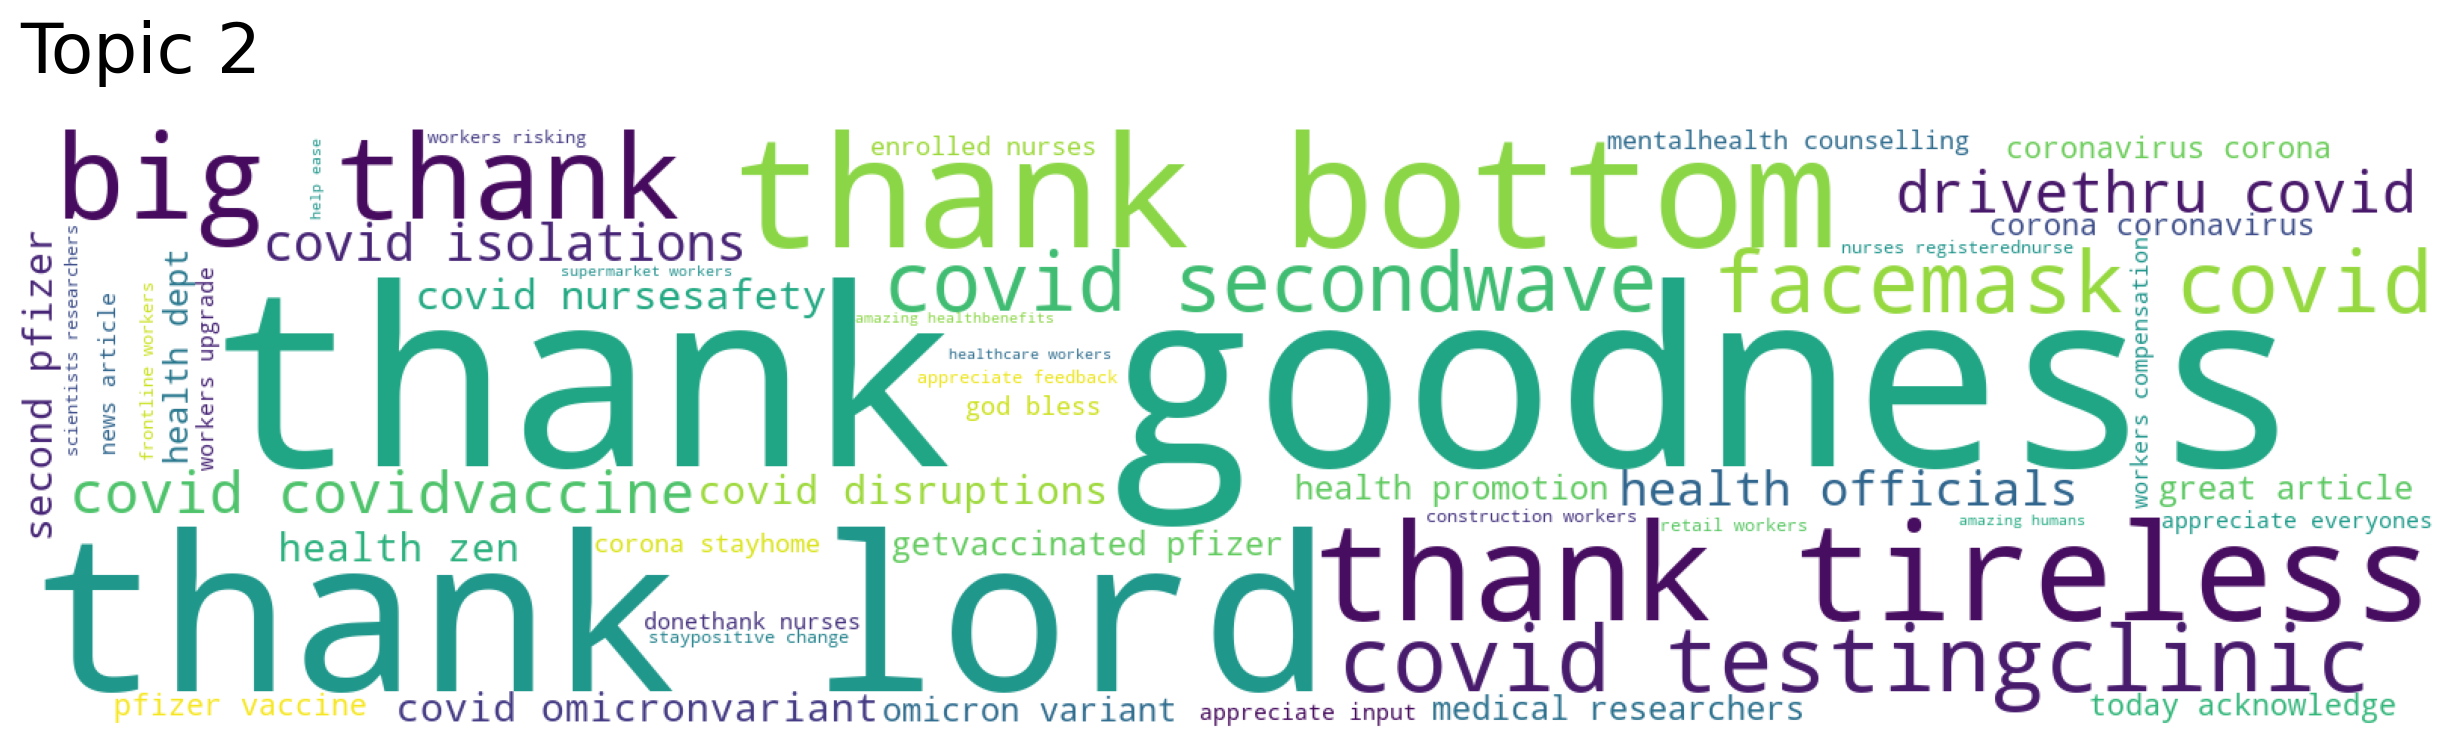

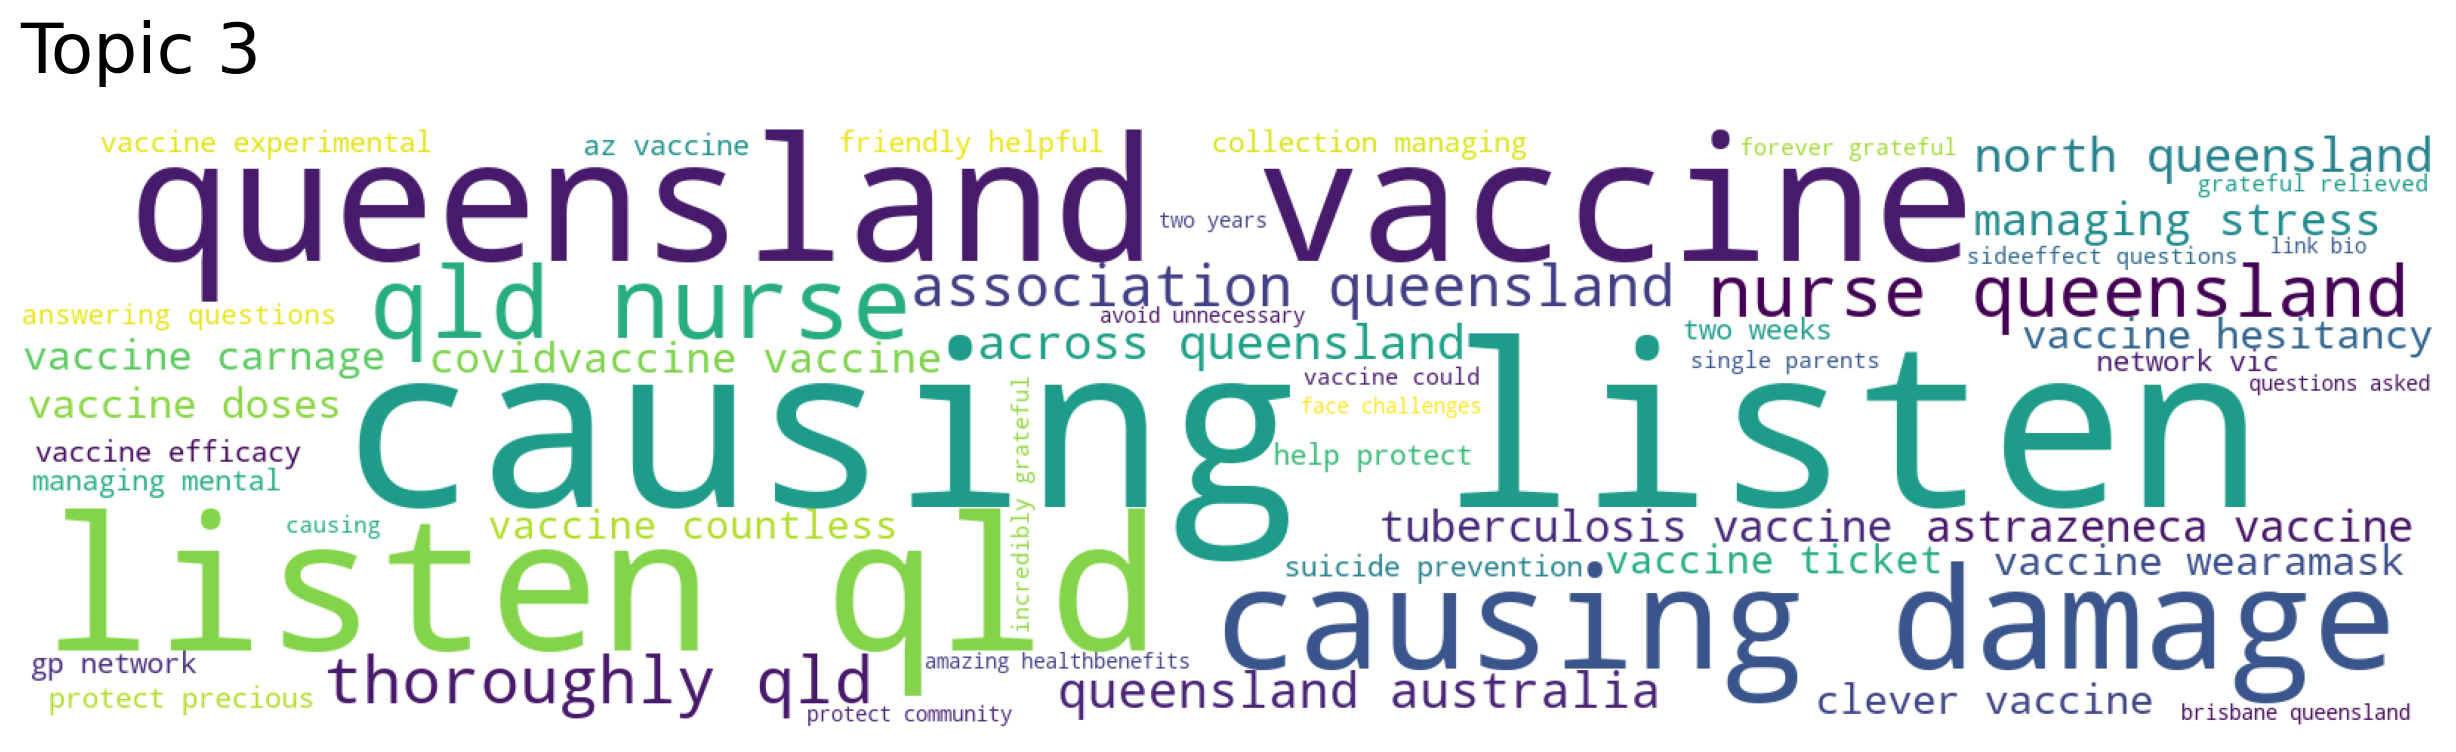

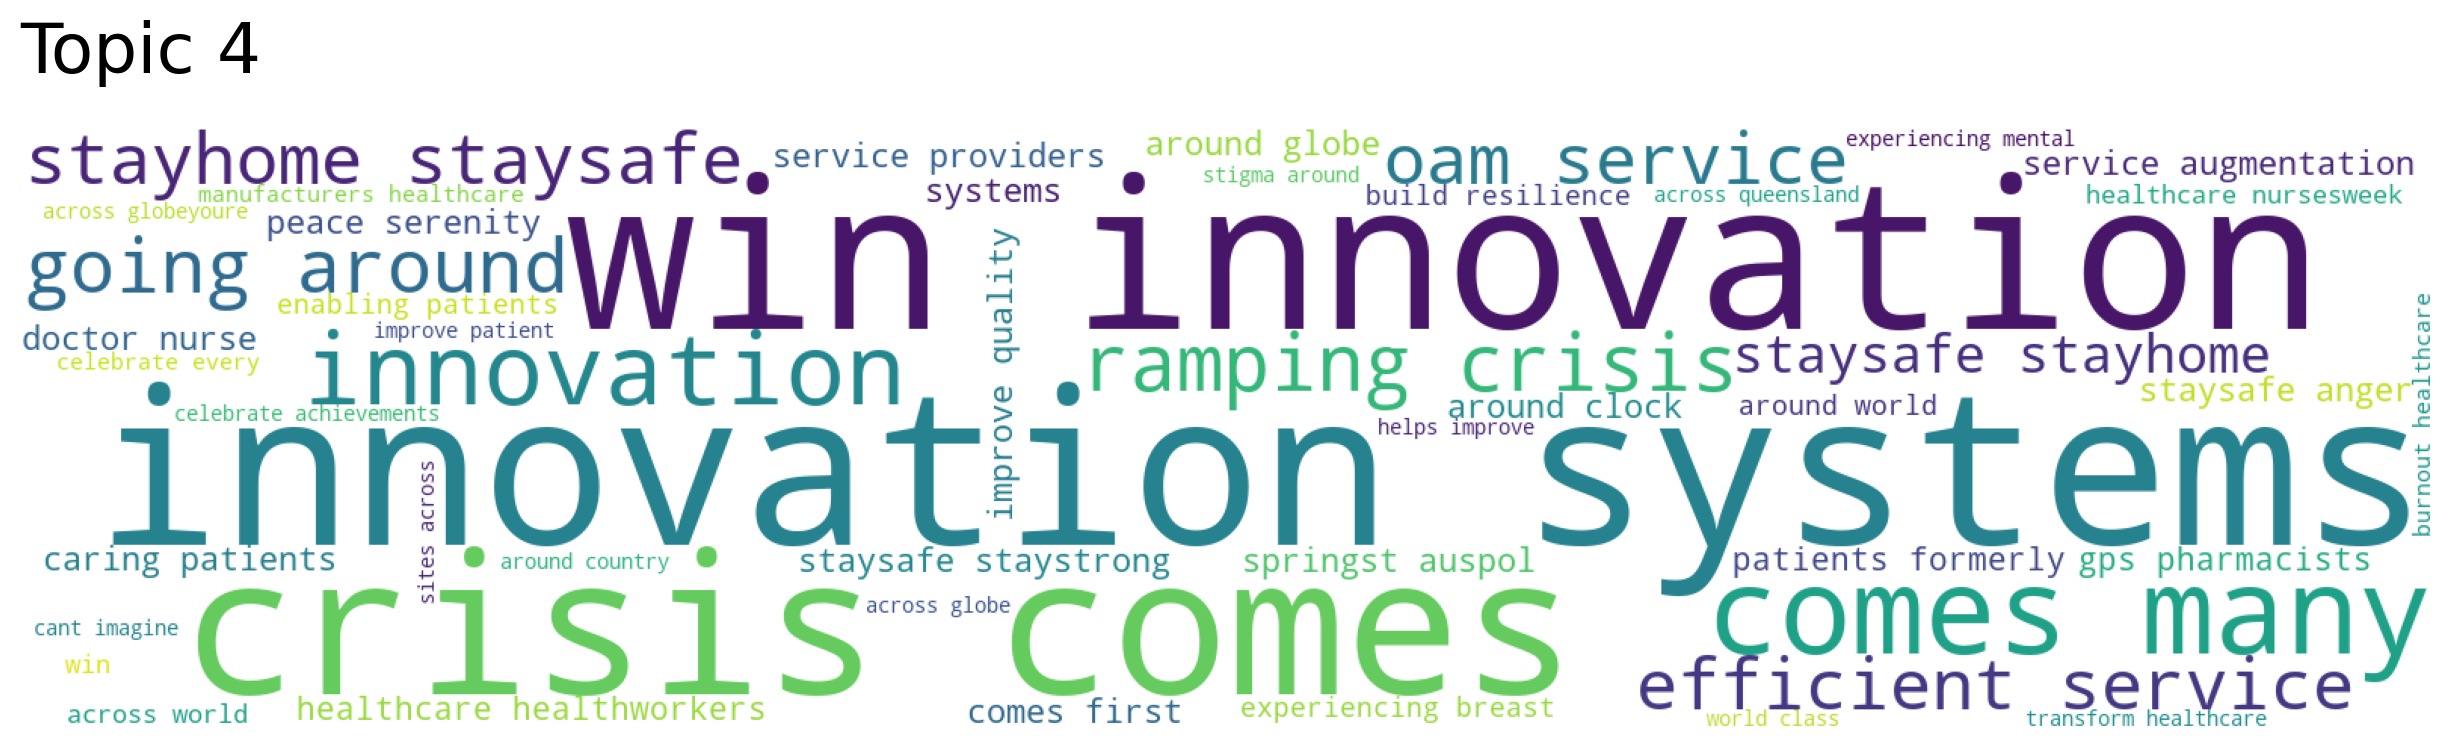

In [26]:
for topic in range(model.get_num_topics()):
    model.generate_topic_wordcloud(topic,background_color="white")

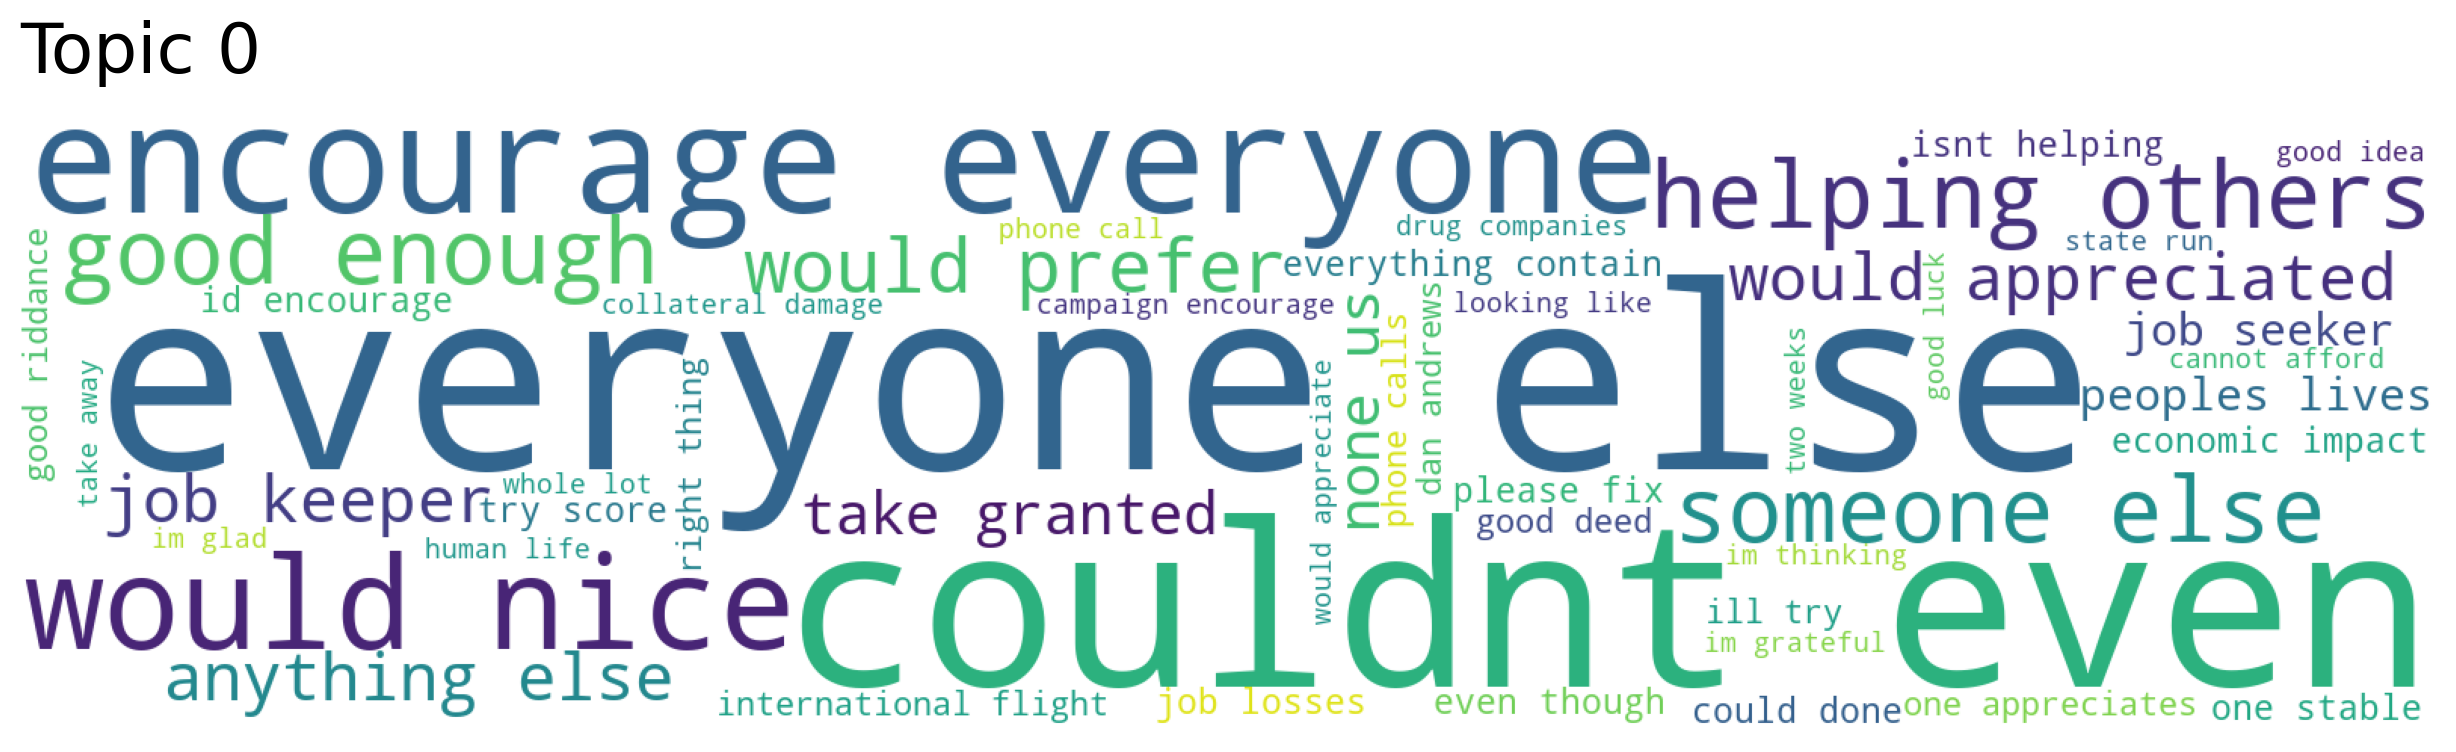

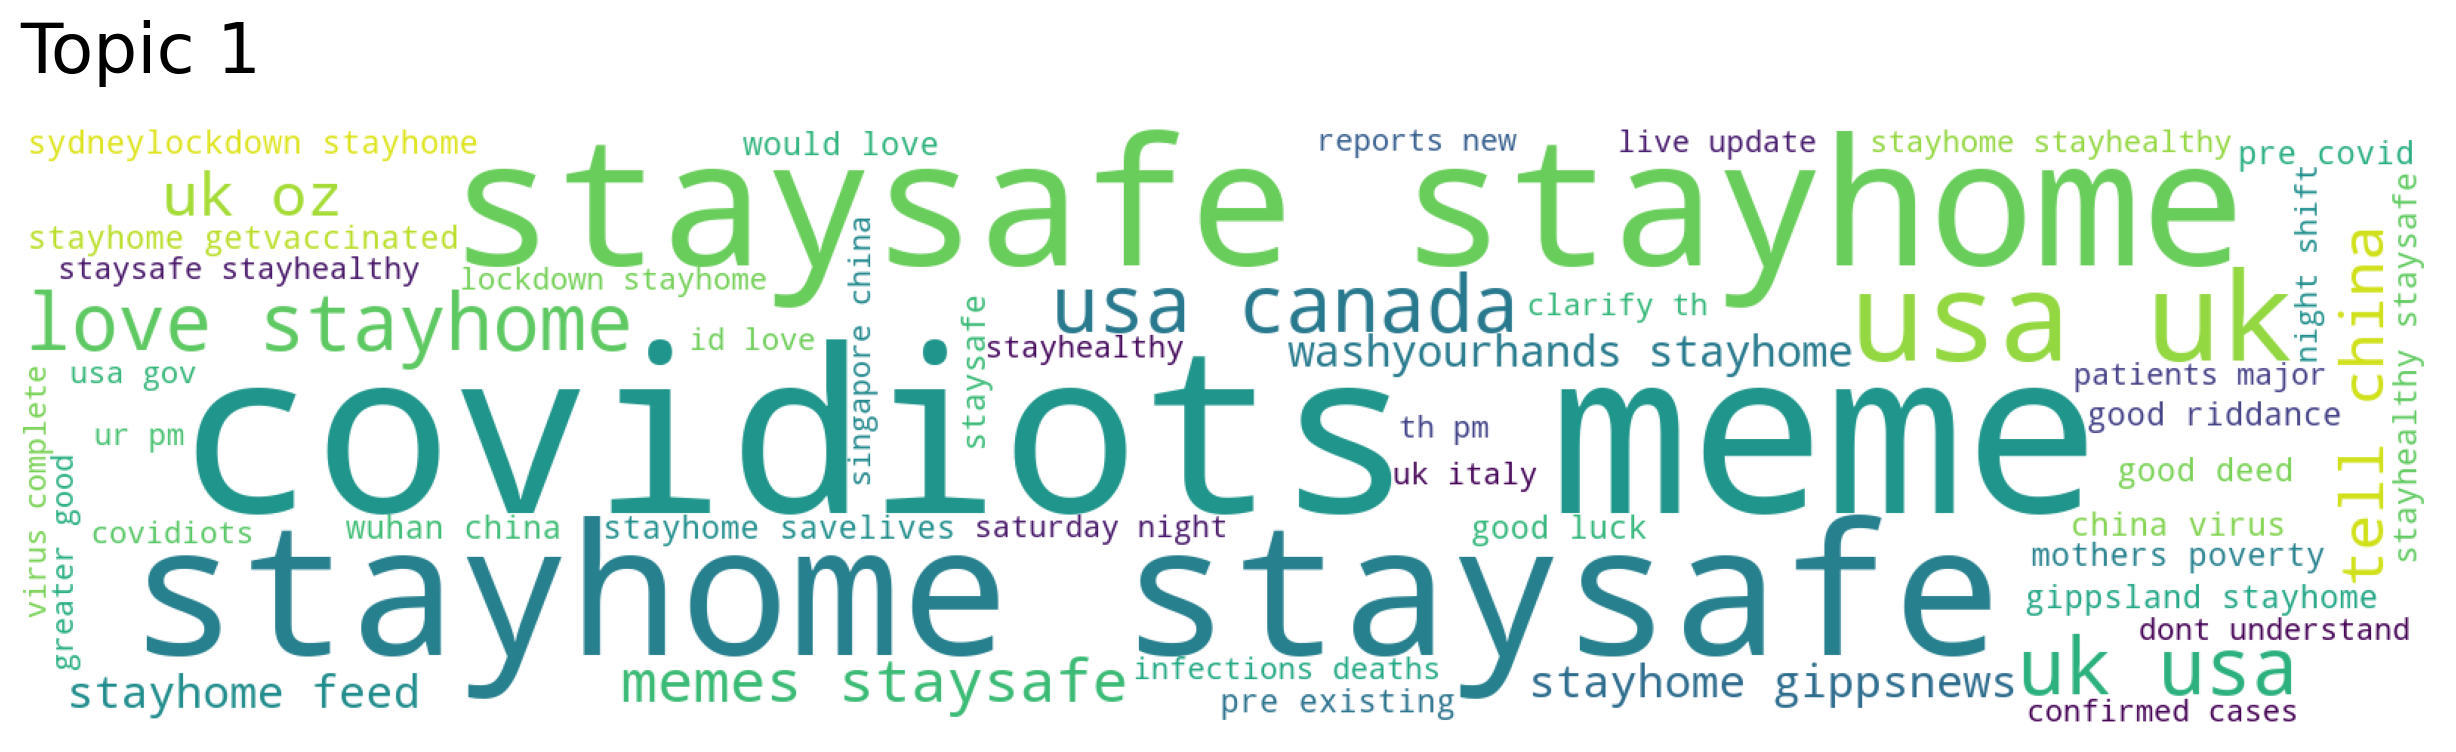

In [27]:
for topic in range(model2.get_num_topics()):
    model2.generate_topic_wordcloud(topic,background_color="white")
#     wc.savefig("ta_result/appreciation/" + country + "/" + topic + ".png")

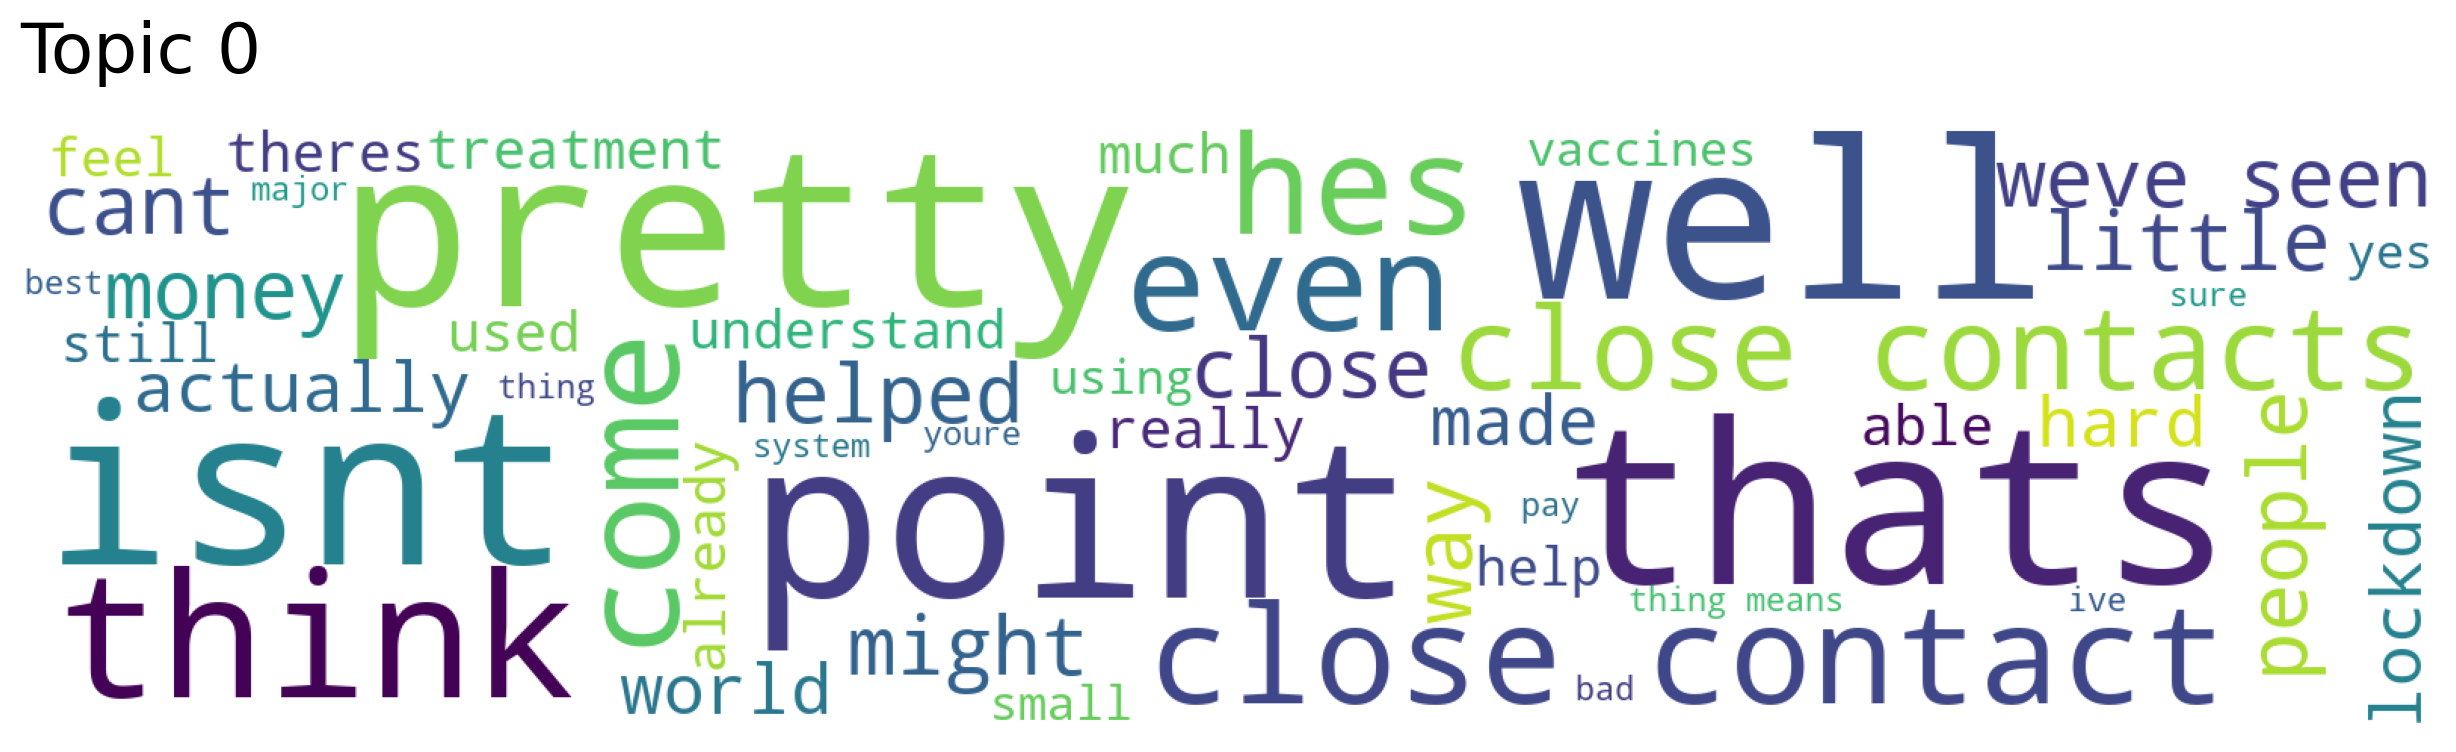

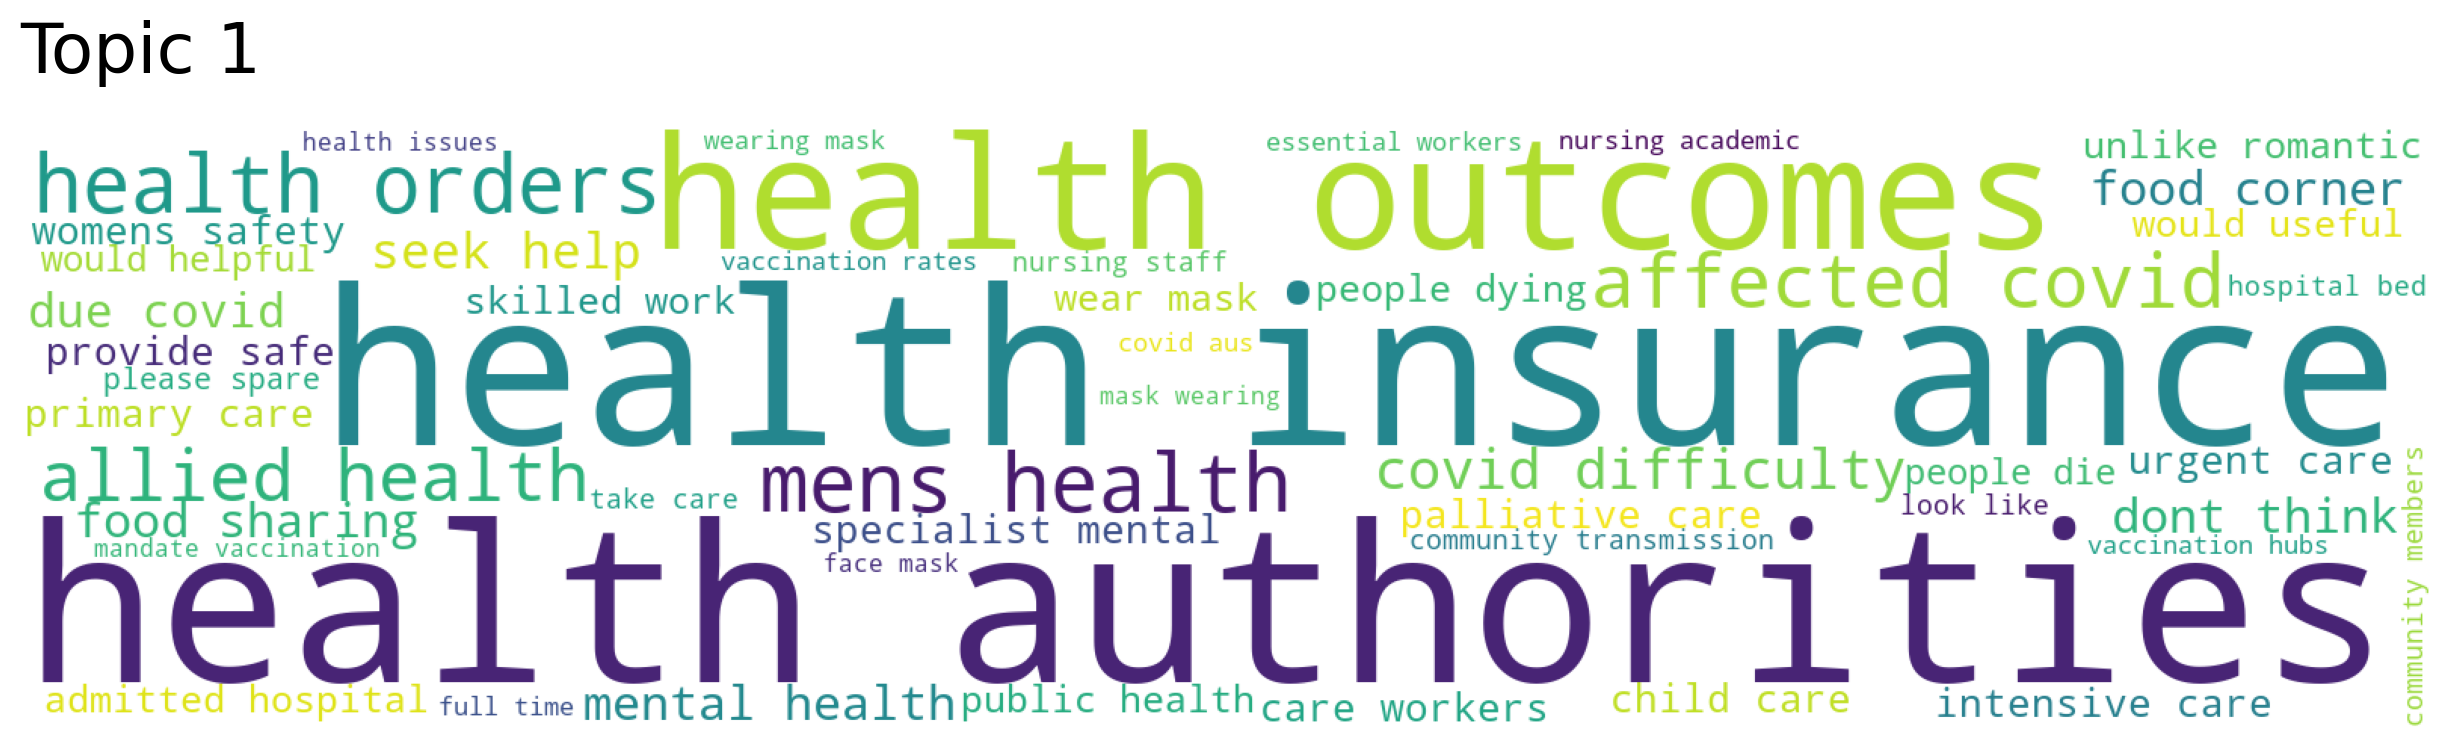

In [28]:
for topic in range(model3.get_num_topics()):
    model3.generate_topic_wordcloud(topic,background_color="white")

In [70]:
model.save("ta_result/appreciation/" + country + "/positive_doc2vec")
model2.save("ta_result/appreciation/" + country + "/negative_doc2vec")
model3.save("ta_result/appreciation/" + country + "/neutral_doc2vec")

NameError: name 'model3' is not defined

In [66]:
import os

countries = ['Argentina','Australia','Austria','Bangladesh','Belgium','Bolivia','Brazil','Bulgaria']
for c in countries:
    if not os.path.exists("ta_result/appreciation/" + c):
        os.makedirs("ta_result/appreciation/" + c)
        os.makedirs("ta_result/appreciation/" + c + "/positive")
        os.makedirs("ta_result/appreciation/" + c + "/negative")
        os.makedirs("ta_result/appreciation/" + c + "/neutral")

In [ ]:
unigrams = []
bigrams = []
trigrams = []
other = []
for word in model.vocab:
    size = len(word.split())
    if size == 1:
        unigrams.append(word)
    elif size == 2:
        bigrams.append(word)
    elif size == 3:
        trigrams.append(worod)
    else:
        other.append(word)
print (len(unigrams))
print (len(bigrams))
print (len(trigrams))
print (len(other))

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=1, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()